##### chap 1.3.2 Arithmetic Operations on Images 이미지 블렌딩

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
img1 = cv2.imread('pokemon.png')    # 이미지를 합치려면 크기를 동일하게, 이미지 타입도 동일하게
img2 = cv2.imread('Opencv.png')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

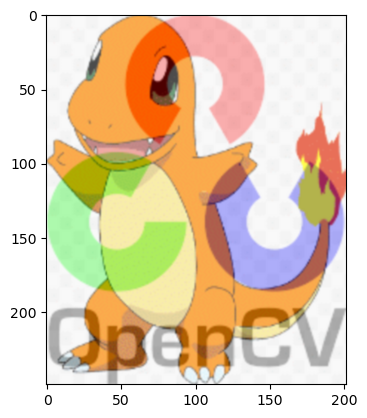

In [7]:
plt_img=cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(plt_img, interpolation = 'bicubic')
plt.show()

In [29]:
# Load two images
img1 = cv2.imread('pokemon.png')
img2 = cv2.imread('Opencv.png')
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]


In [30]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

In [31]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

In [32]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

In [34]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

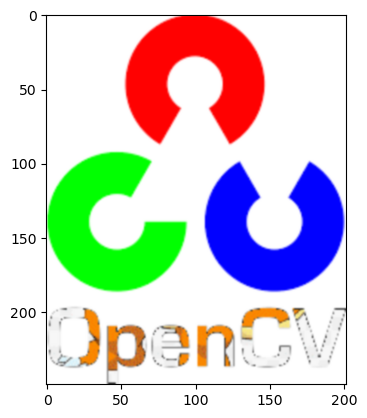

In [35]:
plt_img=cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(plt_img, interpolation = 'bicubic')
plt.show()

In [39]:
img1 = cv2.imread('pokemon.png')
e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2- e1)/cv2.getTickFrequency()
print (t)
# Result I got is 0.521107655 seconds

0.074701


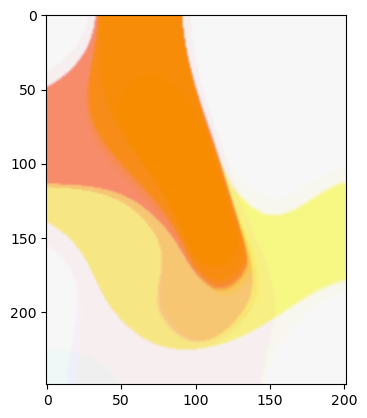

In [42]:
plt_img=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(plt_img, interpolation = 'bicubic')
plt.show()

##### Measuring Perfomance with OpenCV p43

In [49]:
img1 = cv2.imread('pokemon.png')
e1 = cv2.getTickCount()
img1 = cv2.medianBlur(img1,5)   # 픽셀 3by3의 평균값 
e2 = cv2.getTickCount()
t = (e2- e1)/cv2.getTickFrequency()
print (t)
# Result I got is 0.521107655 seconds

0.0016466


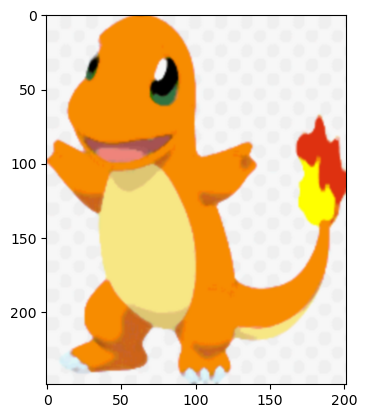

In [50]:
plt_img=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(plt_img, interpolation = 'bicubic')
plt.show()

##### 트랙바를 이용해서 이미지 블러

In [37]:
import cv2
import numpy as np


In [10]:
img1 = cv2.imread('pokemon.png')
def nothing(x):
    pass

In [11]:
cv2.namedWindow('image')
#createtrackbarsforcolorchange
cv2.createTrackbar('median','image',0,10,nothing)   # 0부터 10까지
mimg1=img1
while(1):
    cv2.imshow('image',mimg1)
    k=cv2.waitKey(1)&0xFF
    if k== 27:
        break
    #getcurrentpositionsoffourtrackbars
    m=cv2.getTrackbarPos('median', 'image')
    mimg1=cv2.medianBlur(img1, 2*m+1)
 
cv2.destroyAllWindows()

##### 트랙바를 이용해서 다른 이미지

In [31]:
img1 = cv2.imread('pokemon.png') 
img2 = cv2.imread('Opencv.png')

def nothing(x):
    pass


In [32]:
cv2.namedWindow('image')
#createtrackbarsforcolorchange
cv2.createTrackbar('add','image',0,100,nothing)  
dst = cv2.addWeighted(img1, 1.0, img2, 0,0,0)

while(1):
    cv2.imshow('image', dst)
    k=cv2.waitKey(1) & 0xFF
    if k== 27:
        break
    #getcurrentpositionsoffourtrackbars
    w=cv2.getTrackbarPos('add', 'image')
    dst=cv2.addWeighted(img1, 1-w/100., img2, w/100., 0)
 
cv2.destroyAllWindows()

##### 마우스 좌표

In [36]:
event=[i for i in dir(cv2) if'EVENT' in i]
drawing=False#trueifmouseispressed
mode= True#ifTrue,drawrectangle.Press'm'totoggletocurve
ix,iy=-1,-1
font = cv2.FONT_HERSHEY_SIMPLEX

#mousecallbackfunction
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

if event==cv2.EVENT_LBUTTONDOWN:
    drawing=True
    ix,iy= x,y

elif event==cv2.EVENT_MOUSEMOVE:
    cv2.putText(img,'Mouse Position ('+str(ix)+","+(iy)+")",(10,50), font, 0.7)
    if drawing==True:
        if mode== True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

elif event==cv2.EVENT_LBUTTONUP:
    drawing=False
    if mode== True:
        cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
    else:
        cv2.circle(img,(x,y),5,(0,0,255),-1)

In [34]:
img=cv2.imread((512,512,3),np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k=cv2.waitKey(1)&0xFF
    if k== ord('m'):
        mode=not mode
    elif k==27:
        break
cv2.destroyAllWindows()